In [573]:
import importlib
import random

import albumentations as A
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [574]:
transform = A.Compose(
    [
        A.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225],
        ),
    ]
)

In [584]:
def palette():
    a = np.full((4, 4, GEESE_HEAD[0].shape[0]), 255, dtype=np.uint8)

    for key, val in GEESE_HEAD.items():
        a[0, key] = val

    for key, val in GEESE_BODY.items():
        a[1, key] = val

    for key, val in GEESE_TIP.items():
        a[2, key] = val

    a[3, 0] = FOOD

    plt.imshow(a)
    plt.show()

    try:
        a_ = transform(image=a)
        plt.imshow(a_["image"])
        plt.show()
    except:
        pass
    
    return a

In [585]:
def observation():
    player = 0
    
    b = np.full((7 * 11, GEESE_HEAD[0].shape[0]), 255, dtype=np.uint8)

    # obs = self.obs_list[-1][0]["observation"]
    obs = obs_list[-1][0]["observation"]

    for p, geese in enumerate(obs["geese"]):
        key = p - player % NUM_AGENTS

        # head position
        for pos in geese[:1]:
            b[pos] = GEESE_HEAD[key]

        # body position
        for pos in geese[1:-1]:
            b[pos] = GEESE_BODY[key]

        # tip position
        if len(geese) > 1:
            for pos in geese[-1:]:
                b[pos] = GEESE_TIP[key]

    # previous head position
    if len(obs_list) > 1:

        # obs_prev = self.obs_list[-2][0]["observation"]
        obs_prev = obs_list[-2][0]["observation"]

        for p, geese in enumerate(obs_prev["geese"]):
            if p - player % NUM_AGENTS == 0 and len(geese) in (1, 2):
                b[geese[0]] = GEESE_BODY[0]

    # food
    for pos in obs["food"]:
        b[pos] = FOOD

    # normalize
    # b = b / 255.0

    b = b.reshape(7, 11, GEESE_HEAD[0].shape[0])

    #              縦,     横,     チャネル, 0埋め
    b = np.pad(b, ((4, 5), (2, 3), (0, 0)), "constant")

    plt.imshow(b)
    plt.show()
    
    try:
        c = transform(image=b)
        plt.imshow(c["image"])
        plt.show()
    except:
        pass
    
    return b

In [577]:
obs_list = [
    [
        {
            "action": "EAST",
            "reward": 902,
            "info": {},
            "observation": {
                "remainingOverageTime": 60,
                "step": 8,
                "geese": [[55, 54], [65], [7, 73, 72], [2, 3, 4]],
                "food": [29, 71],
                "index": 0,
            },
            "status": "ACTIVE",
        },
        {
            "action": "NORTH",
            "reward": 901,
            "info": {},
            "observation": {"remainingOverageTime": 60, "index": 1},
            "status": "ACTIVE",
        },
        {
            "action": "EAST",
            "reward": 903,
            "info": {},
            "observation": {"remainingOverageTime": 60, "index": 2},
            "status": "ACTIVE",
        },
        {
            "action": "EAST",
            "reward": 903,
            "info": {},
            "observation": {"remainingOverageTime": 60, "index": 3},
            "status": "ACTIVE",
        },
    ],
    [
        {
            "action": "EAST",
            "reward": 1002,
            "info": {},
            "observation": {
                "remainingOverageTime": 60,
                "step": 9,
                "geese": [[56, 55, 44, 33], [66, 67, 68, 69], [8, 7, 73, 72, 71], [1, 2, 3, 4, 5]],
                "food": [29, 60],
                "index": 0,
            },
            "status": "ACTIVE",
        },
        {
            "action": "NORTH",
            "reward": 1001,
            "info": {},
            "observation": {"remainingOverageTime": 60, "index": 1},
            "status": "ACTIVE",
        },
        {
            "action": "EAST",
            "reward": 1003,
            "info": {},
            "observation": {"remainingOverageTime": 60, "index": 2},
            "status": "ACTIVE",
        },
        {
            "action": "EAST",
            "reward": 1003,
            "info": {},
            "observation": {"remainingOverageTime": 60, "index": 3},
            "status": "ACTIVE",
        },
    ],
]

In [578]:
ACTION = ["NORTH", "SOUTH", "WEST", "EAST"]
NUM_AGENTS = 4

GEESE_HEAD = {
    0: np.array([166, 19, 3], dtype=np.uint8),
    1: np.array([10, 143, 67], dtype=np.uint8),
    2: np.array([21, 123, 191], dtype=np.uint8),
    3: np.array([107, 27, 140], dtype=np.uint8),
}
GEESE_BODY = {
    0: np.array([231, 76, 60], dtype=np.uint8),
    1: np.array([48, 171, 60], dtype=np.uint8),
    2: np.array([52, 152, 219], dtype=np.uint8),
    3: np.array([155, 89, 182], dtype=np.uint8),
}
GEESE_TIP = {
    0: np.array([240, 148, 139], dtype=np.uint8),
    1: np.array([119, 224, 130], dtype=np.uint8),
    2: np.array([121, 191, 237], dtype=np.uint8),
    3: np.array([212, 157, 235], dtype=np.uint8),
}

FOOD = np.array([241, 196, 15], dtype=np.uint8)

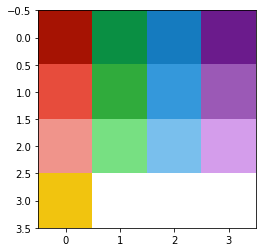

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


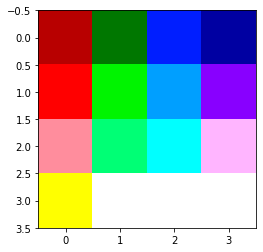

In [579]:
palette()

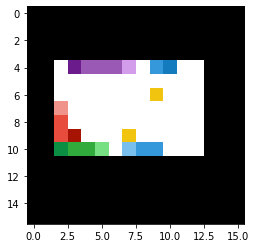

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


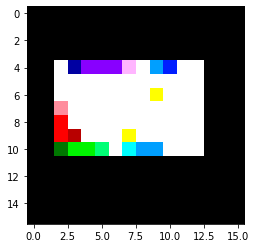

In [580]:
observation()

In [581]:
GEESE_HEAD = {
    0: np.array([255, 121, 121, 255], dtype=np.uint8),
    1: np.array([106, 176, 76, 255], dtype=np.uint8),
    2: np.array([104, 109, 224, 255], dtype=np.uint8),
    3: np.array([224, 86, 253, 255], dtype=np.uint8),
}
GEESE_BODY = {
    0: np.array([255, 121, 121, 200], dtype=np.uint8),
    1: np.array([106, 176, 76, 200], dtype=np.uint8),
    2: np.array([104, 109, 224, 200], dtype=np.uint8),
    3: np.array([224, 86, 253, 200], dtype=np.uint8),
}
GEESE_TIP = {
    0: np.array([255, 121, 121, 150], dtype=np.uint8),
    1: np.array([106, 176, 76, 150], dtype=np.uint8),
    2: np.array([104, 109, 224, 150], dtype=np.uint8),
    3: np.array([224, 86, 253, 150], dtype=np.uint8),
}

FOOD = np.array([249, 202, 36, 255], dtype=np.uint8)

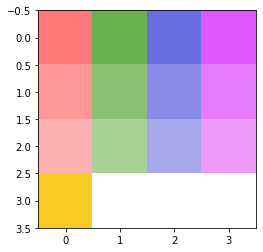

In [582]:
palette()

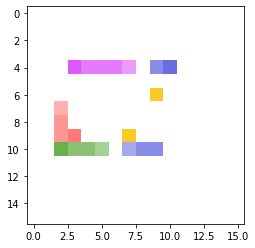

In [586]:
b = observation()

In [589]:
b.shape

(16, 16, 4)

In [593]:
b.transpose(2, 0, 1).reshape(1, -1).shape

(1, 1024)